In [1]:
import torch
import torch.nn as nn
import numpy as np
import os, glob
import json
from models import eeg_AutoEncoder
from trainer.utils import plot_recon_figure, plot_recon_figures_bychannels
import matplotlib
import matplotlib.pyplot as plt
from datalibs import EEGPrepDataset

In [2]:
def json_load(path:str):
    with open(path, "r") as jsonFile:
        jsonDict = json.load(jsonFile)
    return jsonDict
    
def json_parser(json_dict, folder_name):

    name               = json_dict["name"]
    data_name          = json_dict["data_name"]
    log_dir            = json_dict["log_dir"]
    ckpt_dir           = json_dict["ckpt_dir"]
    eeg_train_path     = json_dict["eeg_train_path"]
    eeg_test_path      = json_dict["eeg_test_path"]
    eeg_val_path       = json_dict["eeg_val_path"]
    img_path           = json_dict["img_path"]
    split_path         = json_dict["split_path"]

    ########################################
    #            Model Setting
    ########################################
    in_seq         = json_dict["in_seq"]
    in_channels    = json_dict["in_channels"]
    z_channels     = json_dict["z_channels"]
    out_seq        = json_dict["out_seq"]
    dims           = json_dict["dims"]
    shortcut       = bool(json_dict["shortcut"])
    dropout        = json_dict["dropout"]
    groups         = json_dict["groups"]
    layer_mode     = json_dict["layer_mode"]
    block_mode     = json_dict["block_mode"]
    down_mode      = json_dict["down_mode"]
    up_mode        = json_dict["up_mode"]
    pos_mode       = json_dict["pos_mode"]
    skip_mode      = json_dict["skip_mode"]
    n_layer        = json_dict["n_layer"]
    n_head         = json_dict["n_head"]
    dff_factor     = json_dict["dff_factor"]
    stride         = json_dict["stride"]

    restart   = json_dict["restart"]
 
    MODEL = eeg_AutoEncoder(in_seq,  in_channels, z_channels, out_seq,    
                                        dims, shortcut, dropout, groups, layer_mode, 
                                        block_mode, down_mode, up_mode, pos_mode, skip_mode, 
                                        n_layer, n_head, dff_factor, stride).cuda()
    
    dict_model = torch.load(os.path.join(folder_name, f"{name}_{restart}.pth"))
    MODEL.load_state_dict(dict_model["net"])
    
    test_dataset  = EEGPrepDataset(eeg_pre_path = eeg_test_path,  eeg_data_path = img_path)
    return MODEL, test_dataset

# model load and select

In [3]:
model_num = 6
data_num  = 311

In [4]:
josn_file =  os.path.join('.','config','EEGAE_Test.json')
folder_name = glob.glob(os.path.join('.','ckpt_dir', '*'))
folder_name.sort()
print(folder_name)

['./ckpt_dir/EEG_condition_MSE', './ckpt_dir/EEG_condition_MSE_SDSC_1', './ckpt_dir/EEG_condition_SMSE', './ckpt_dir/EEG_condition_SMSE_SDSC_1', './ckpt_dir/EEG_condition_SMSE_SDSC_10', './ckpt_dir/EEG_condition_SMSE_SDSC_SEP', './ckpt_dir/EEG_condition_SMSE_SDSC_SEP_10', './ckpt_dir/README.md']


In [5]:
json_dict = json_load(josn_file)
model, data     = json_parser(json_dict, folder_name[model_num])

Start Load...
End Time : 0.0733s


# set data

In [6]:
eeg, _ = data[data_num]
eeg = torch.from_numpy(eeg).unsqueeze(0).cuda()
latent, rec = model(eeg)

eeg = eeg.detach().cpu().numpy()
rec = rec.detach().cpu().numpy()

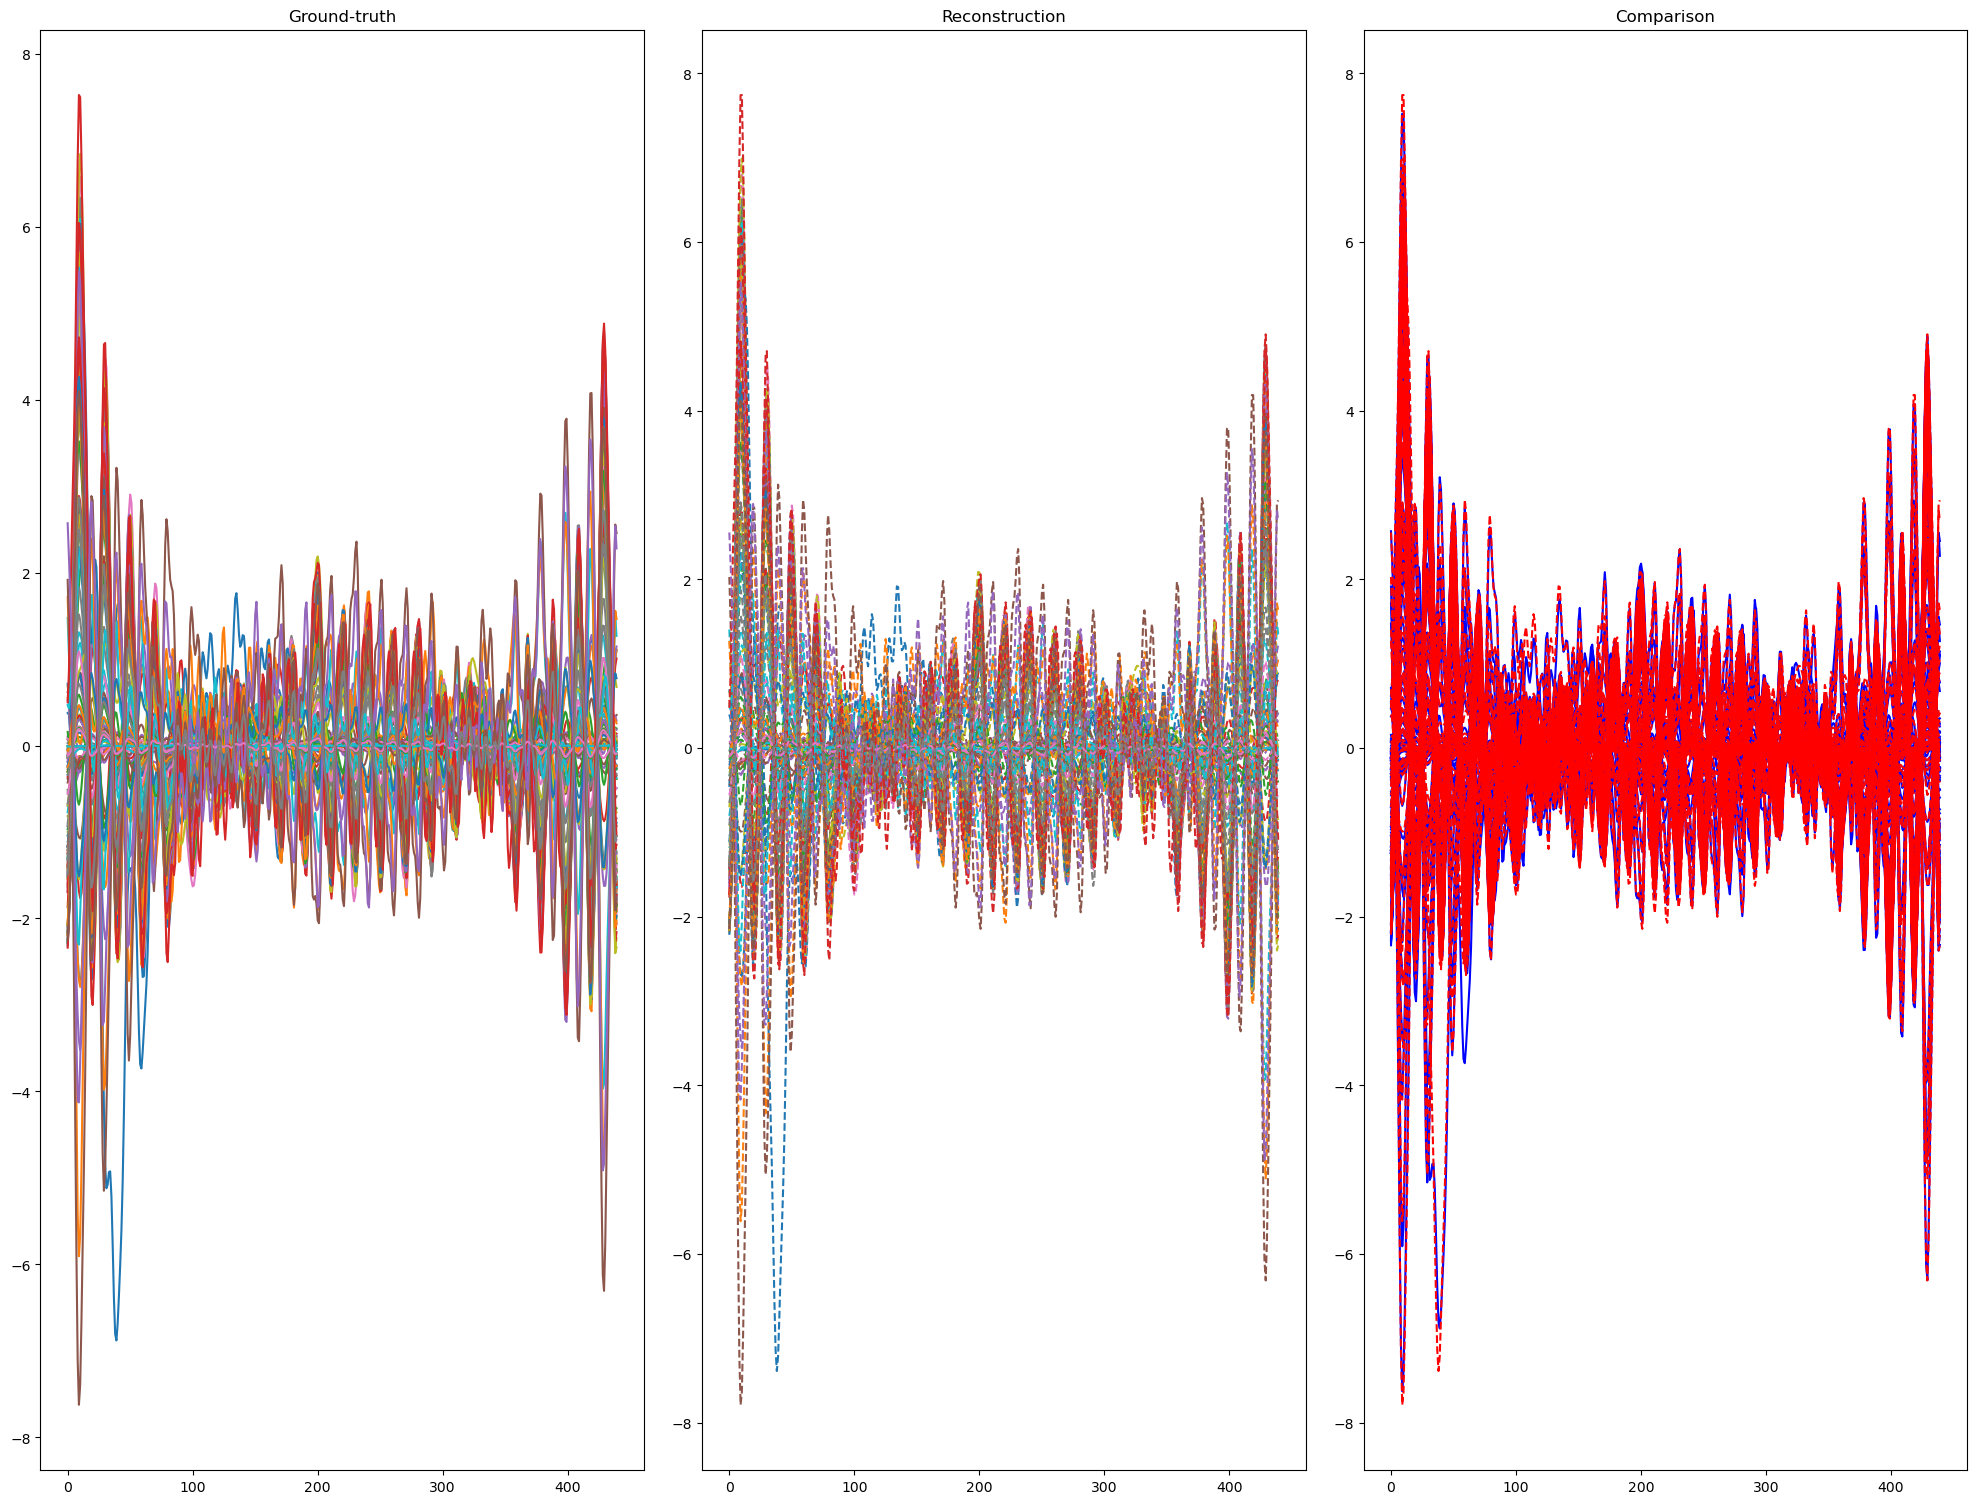

In [7]:
plot_recon_figure(eeg, rec, ".", 1, name=folder_name[model_num].split("/")[-1], save=True)

In [8]:
plot_recon_figures_bychannels(eeg, rec, ".", name=folder_name[model_num].split("/")[-1], save=True)